In [11]:
import os
import sys
import numpy as np

sys.path.append('../')
from utils import load_all_fmri_for_subject
from dataset import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test NSD Datasets

In [3]:
nsd_dataset = NSDImageDataset(plot=False,
                                nsd_path='../../StableDiffusionReconstruction/nsd',
                                sub='sub01')

print(max(nsd_dataset.idxs))

72999


In [8]:

betas_path = '../data/betas_nsd'
targets_path = '../data/target_vectors_nsd/z_zeroscope'
nsd_path = '../data/nsd'

nsd_bt_dataset = NSDBetasAndTargetsDataset( 
                 betas_path, 
                 targets_path, 
                 nsd_path=nsd_path,
                 avg_reps=False, 
                 rois=['BMDgeneral','lPPA','rPPA'],
                 subs=[1],
                 subset='both')
print("dataset len:", len(nsd_bt_dataset))
betas, targets = nsd_bt_dataset[2]
print('betas.shape',betas.shape)
print('targets.shape',targets.shape)
print('betas.max()',betas.max())
print('betas.min()',betas.min())
print('targets.max()',targets.max())
print('targets.min()',targets.min())

self.stim_idxs len for subset both 10000
dataset len: 30000
betas.shape (16640,)
targets.shape (65340,)
betas.max() 4.5055658493134985
betas.min() -3.435439457409122
targets.max() 2.246
targets.min() -2.732


## Test BMD Datasets

In [55]:

betas_path = '../data/betas_impulse'
targets_path = '../data/target_vectors/blip'

bmd_bt_dataset = BMDBetasAndTargetsDataset( 
                 betas_path, 
                 targets_path, 
                 avg_reps=False, 
                 beta_type='impulse',
                 rois=['BMDgeneral'],
                 subs=[1],
                 subset='test')

print(len(bmd_bt_dataset))

betas, targets = bmd_bt_dataset[3]
print(betas.shape, targets.shape)

print(betas.max(), betas.min(), targets.max(), targets.min())

1020
(16346,) (173568,)
3.941730546873685 -3.6130260817140742 3.1705143 -6.416951


## Test concatenating both BMD and NSD datasets

In [9]:
# concatenate both 
from torch.utils.data import ConcatDataset

concat_dataset = ConcatDataset([nsd_bt_dataset, bmd_bt_dataset])


betas, targets = bmd_bt_dataset[1000]
print(betas.shape, targets.shape)

print(betas.max(), betas.min(), targets.max(), targets.min())

IndexError: list index out of range

# Test HAD Dataset

### HadVideoDataset

Dataset length: 21600
n_frames 61  - frame shape: (244, 244, 3)


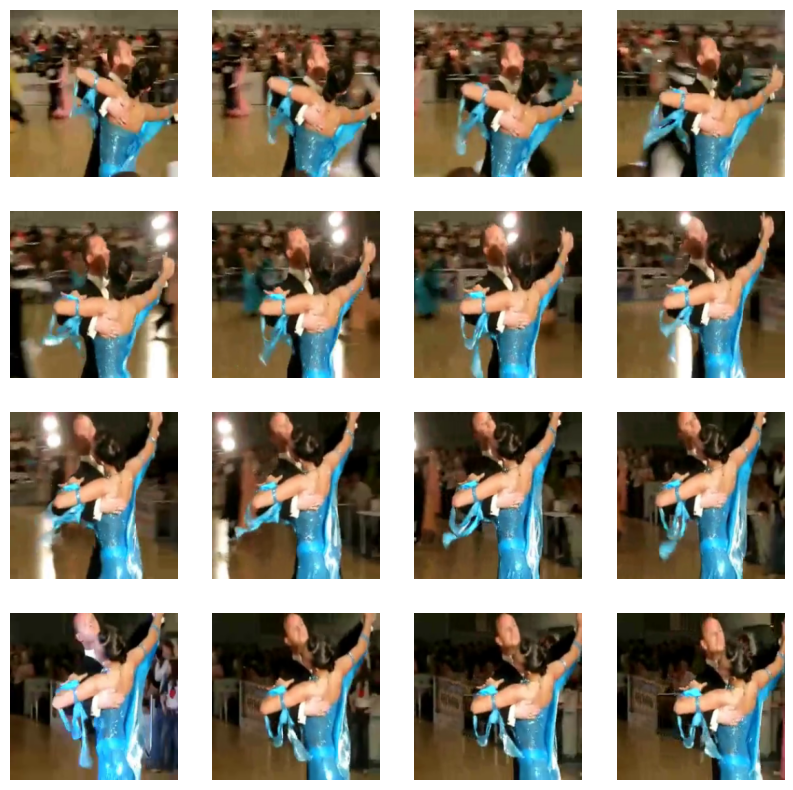

In [17]:
from dataset import HADVideoDataset
from utils import plot_video

had_path = '../data/stimuli_had/'

had_dataset = HADVideoDataset( 
                 had_path, 
                 metadata_path = '../data/metadata_had',
                 subset='all',
                 resolution=244,
                 transform=None,
                 normalize=False,
                 return_filename=False,
                 load_from_frames=False)

print('Dataset length:', len(had_dataset))

video = had_dataset[15000]

print('n_frames',len(video),' - frame shape:', video[0].shape)

plot_video(video, frames_to_skip=4)


## HADBetasAndTargetsDataset

In [1]:
# Import necessary modules and classes
from dataset import HADBetasAndTargetsDataset

betas_path = '../data/betas_cifti_had'
targets_path = '../data/target_vectors_had/z_zeroscope'

# Instantiate the HADBetasAndTargetsDataset
had_bt_dataset = HADBetasAndTargetsDataset(betas_path, targets_path, avg_reps=False)

# Print the length of the dataset
print("Dataset length:", len(had_bt_dataset))

# Retrieve a sample from the dataset
betas, targets = had_bt_dataset[0]

# Print the shapes and values of the betas and targets
print("betas.shape:", betas.shape)
print("targets.shape:", targets.shape)
print("betas.max():", betas.max())
print("betas.min():", betas.min())
print("targets.max():", targets.max())
print("targets.min():", targets.min())


ModuleNotFoundError: No module named 'dataset'

In [5]:
import numpy as np

print(np.load('../data/target_vectors_bmd/z_zeroscope/0001.npy')
        .shape)

(15, 4, 33, 33)


In [24]:
import pickle as pkl

filename_cc2017 = '../data/betas_cifti_cc2017/sub01/prepared_allvoxel_pkl/Group41_estimates-TSTrialEstimates_z=1.pkl'

with open(filename_cc2017, 'rb') as f:
    data = pkl.load(f)

# size in megabytes of pkl
import os
print(os.path.getsize(filename_cc2017)/(1024*1024))

print(data.keys())
print(data['train_data_allvoxel'].shape)
print(data['test_data_allvoxel'].shape)
print(len(data['train_stim_order']))
print(data['train_stim_order'])
print(data['test_stim_order'])
print(len(set(data['train_stim_order'])))

print(data['train_data_allvoxel'].max())
print(data['train_data_allvoxel'].min())

2070.406481742859
dict_keys(['train_data_allvoxel', 'test_data_allvoxel', 'train_stim_order', 'test_stim_order', 'test_noiseceiling_allvoxel', 'roi_indices_hcp'])
(8604, 13156)
(11990, 13156)
8604
['seg1_begin-2_end-4', 'seg1_begin-4_end-6', 'seg1_begin-6_end-8', 'seg1_begin-8_end-10', 'seg1_begin-10_end-12', 'seg1_begin-12_end-14', 'seg1_begin-14_end-16', 'seg1_begin-16_end-18', 'seg1_begin-18_end-20', 'seg1_begin-20_end-22', 'seg1_begin-22_end-24', 'seg1_begin-24_end-26', 'seg1_begin-26_end-28', 'seg1_begin-28_end-30', 'seg1_begin-30_end-32', 'seg1_begin-32_end-34', 'seg1_begin-34_end-36', 'seg1_begin-36_end-38', 'seg1_begin-38_end-40', 'seg1_begin-40_end-42', 'seg1_begin-42_end-44', 'seg1_begin-44_end-46', 'seg1_begin-46_end-48', 'seg1_begin-48_end-50', 'seg1_begin-50_end-52', 'seg1_begin-52_end-54', 'seg1_begin-54_end-56', 'seg1_begin-56_end-58', 'seg1_begin-58_end-60', 'seg1_begin-60_end-62', 'seg1_begin-62_end-64', 'seg1_begin-64_end-66', 'seg1_begin-66_end-68', 'seg1_begin-68_en

In [25]:
filename_had = '../data/betas_cifti_had/sub02/prepared_allvoxel_pkl/Group41_betas-GLMsingle_type-typeb_z=1.pkl'

with open(filename, 'rb') as f:
    data = pkl.load(f)

# size in megabytes of pkl
import os
print(os.path.getsize(filename_had)/(1024*1024))

print(data.keys())
print(data['data_allvoxel'].shape)
print(data['data_allvoxel'].max())
print(data['data_allvoxel'].min())
print(len(data['stim_order']))

36.270734786987305
dict_keys(['data_allvoxel', 'stim_order', 'roi_indices_hcp'])
(720, 1, 13156)
5.6543584
-7.4183793
720
